**In this analysis, game data from a total of 2559 regular season NFL games covering a span of ten years from 2010-2019 is considered, obtained from http://pro-football-reference.com. The aim of this regression analysis is to predict the total points in a given NFL contest based on game conditions and statistics from the participating teams averaged over the previous five games. Only contests taking place from the sixth week of the season to the last week of the regular season are considered for prediction, totalling 1734 games. A description of the features used in this analysis follows.**

**Descriptive Features** - Used solely to describe the contest in question
 * Home_Team - The name of the home team in the contest
 * Vis_Team - The name of the visiting team in the contest
 * H_Game - The number of points scored by the home team in the contest
 * V_Game - The number of points scored by the visiting team in the contest
 
**Analytical Features** - Features used in analysis
 * Tot_Pts - Total Points of the contest. **This is our target variable.**
 * Over/Under - The predicted total points of the contest from professional bookmakers.
 
*Averaged Features* - Statistics averaged over previous five contests. In the columns, prefix "H_" stands for Home Team and "V_" stands for Visiting Team
 * Pts - Points scored
 * Pts_Opp - Points scored by opponent
 * Off_Pass - Offensive passing yards
 * Pass_Metric - Average of offensive passing rank (32 - best, 1 - worst) and defensive passing rank of opponent (1 - best, 32 - worst)
 * Off_Rush - Offensive rushing yards
 * Rush_Metric - Average of offensive rushing rank and defensive rushing rank of opponent
 * Def_Pass - Passing yards given up on defensive
 * Def_Rush - Rushing yards given up on defensive
 * TD - Touchdowns scored
 * TD_on_Def - Touchdowns scored by defense
 * FG_Pct - Percentage of field goals made vs. field goals attempted
 * RZ_Pct - Percentage of red zone possessions resulting in a touchdown (red zone possession is possession reaching opponent's 20 yard line)
 * Def_RZ_Pct - Defensive percentage of red zone possessions giving up a touchdown
 * Poss - Time of possession
 * Plays - Total number of plays
 * TO_Gain - Number of turnovers gained by defense
 * TO_Lost - Number of turnovers lost by offense
 * Yds_Pen - Number of yards penalized
 * Sacks_Def - Sacks earned by defense
 * Tackles_Loss - Number of tackles for loss earned by defense
 * Kickret - Return yards from kickoff
 * Puntret - Return yards from punt
 
*Game Conditions* - Conditions of the contest in question
 * Temperature - Temperature of the contest at kickoff
 * surface - The surface on which the contest was played

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set(font_scale=1.4)

In [4]:
teams = {'Atlanta Falcons':'atl','Buffalo Bills':'buf','Carolina Panthers':'car','Chicago Bears':'chi',
         'Cincinnati Bengals':'cin','Cleveland Browns':'cle','Indianapolis Colts':'clt',
         'Arizona Cardinals':'crd','Dallas Cowboys':'dal','Denver Broncos':'den','Detroit Lions':'det',
         'Green Bay Packers':'gnb','Houston Texans':'htx','Jacksonville Jaguars':'jax',
         'Kansas City Chiefs':'kan','Miami Dolphins':'mia','Minnesota Vikings':'min','New Orleans Saints':'nor',
         'New England Patriots':'nwe','New York Giants':'nyg','New York Jets':'nyj','Tennessee Titans':'oti',
         'Philadelphia Eagles':'phi','Pittsburgh Steelers':'pit','Oakland Raiders':'rai',
         'Las Vegas Raiders':'rai','St. Louis Rams':'ram','Los Angeles Rams':'ram','Baltimore Ravens':'rav',
         'San Diego Chargers':'sdg','Los Angeles Chargers':'sdg','Seattle Seahawks':'sea',
         'San Francisco 49ers':'sfo','Tampa Bay Buccaneers':'tam','Washington Redskins':'was'}

In [55]:
path = 'data/df_raw.pkl'
with open(path,'rb') as f:
    dfall = pickle.load(f)
dfall

Home/Away              Opponent Points Points_Opp  \
Team Code                                                             
phi  201009120phi         H     Green Bay Packers     20         27   
     201009190det         A         Detroit Lions     35         32   
     201009260jax         A  Jacksonville Jaguars     28          3   
     201010030phi         H   Washington Redskins     12         17   
     201010100sfo         A   San Francisco 49ers     27         24   
...                     ...                   ...    ...        ...   
was  201912010car         A     Carolina Panthers     29         21   
     201912080gnb         A     Green Bay Packers     15         20   
     201912150was         H   Philadelphia Eagles     27         37   
     201912220was         H       New York Giants     35         41   
     201912290dal         A        Dallas Cowboys     16         47   

                  Yds_Off_Pass Yds_Off_Rush Yds_Def_Pass Yds_Def_Rush TD  \
Team Code                                                                  
phi  201009120phi          199          149          188          132  2   
     201009190det          284          162          335          115  5   
     201009260jax          291          106          105          139  4   
     201010030phi          250          110          125          169  1   
     201010100sfo          253          125          309           74  3   
...                        ...          ...          ...          ... ..   
was  201912010car          147          248          278           65  3   
     201912080gnb          170          121          195          174  2   
     201912150was          261          101          266          157  3   
     201912220was          302           80          352          206  5   
     201912290dal          206           88          303          223  1   

                  TD_on_Def  ... RZ_Def_Att Possession Plays TO_Gained  \
Team Code                    ...                                         
phi  201009120phi         0  ...          2  28.083333    62         2   
     201009190det         0  ...          4  30.866667    68         2   
     201009260jax         0  ...          2  27.116667    55         1   
     201010030phi         0  ...          2  32.950000    70         1   
     201010100sfo         1  ...          3  30.800000    65         5   
...                     ...  ...        ...        ...   ...       ...   
was  201912010car         0  ...          4  30.616667    61         2   
     201912080gnb         0  ...          5  29.600000    60         1   
     201912150was         0  ...          5  23.050000    53         1   
     201912220was         0  ...          3  33.800000    64         0   
     201912290dal         0  ...          3  25.750000    62         1   

                  TO_Lost Yds_Pen  Sacks_Def Tackles_Loss Yds_per_Kickret  \
Team Code                                                                   
phi  201009120phi       1      80        3.0            6       23.250000   
     201009190det       0      75        2.0           10       21.800000   
     201009260jax       0      84        7.0            2       16.750000   
     201010030phi       2      80        1.0            2       12.000000   
     201010100sfo       1      30        2.0            5       25.200000   
...                   ...     ...        ...          ...             ...   
was  201912010car       0      65        7.0            5       16.000000   
     201912080gnb       1      25        4.0            6        0.000000   
     201912150was       1      60        2.0            3       29.666667   
     201912220was       0      51        1.0            6       25.000000   
     201912290dal       2      10        3.0            7       28.500000   

                  Yds_per_Puntret  
Team Code                          
phi  201009120phi        7.000000  
     201009190det       11.33333

In [5]:
path = 'data/df_working.pkl'
with open(path, 'rb') as f:
    dfgame = pickle.load(f)

In [6]:
from sklearn.model_selection import train_test_split

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

y = np.ravel(dfgame['Tot_Pts'])
X = dfgame.drop('Tot_Pts',axis=1)
# 70% split for training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1 - train_ratio, random_state = 77)
# 15%, 15% split for validation, test data
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, 
                                                test_size = test_ratio/(test_ratio + validation_ratio))
X_show = X_train.copy(deep=False)
tp = pd.Series(index=X_train.index,dtype='int64')
for code in tp.index: tp[code] = dfgame.loc[code,'Tot_Pts']
X_show.insert(4,'Tot_Pts',tp)

In [7]:
X_show

,Home_Team,Vis_Team,H_Game,V_Game,Tot_Pts,Over/Under,H_Pts,H_Pts_Opp,V_Pts,V_Pts_Opp,...,H_Puntret,V_Puntret,Temperature,a_turf,astroplay,astroturf,fieldturf,grass,matrixturf,sportturf
Code,,,,,,,,,,,,,,,,,,,,,
201912080buf,Buffalo Bills,Baltimore Ravens,17,24,41,44.0,24.6,13.2,38.4,12.6,...,4.800000,4.600000,43,0,0,1,0,0,0,0
201411020htx,Houston Texans,Philadelphia Eagles,21,31,52,48.5,24.2,23.2,27.8,22.4,...,5.826667,11.550000,70,0,0,0,0,1,0,0
201012120pit,Pittsburgh Steelers,Cincinnati Bengals,23,7,30,39.5,24.0,17.8,21.8,31.8,...,7.719048,1.040000,37,0,0,0,0,1,0,0
201911170ram,Los Angeles Rams,Chicago Bears,17,7,24,40.0,21.8,17.4,19.2,22.4,...,4.333333,12.640000,79,0,0,0,0,1,0,0
201010310det,Detroit Lions,Washington Redskins,37,25,62,45.0,26.4,24.2,18.0,19.2,...,10.600000,12.933333,70,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201710220gnb,Green Bay Packers,New Orleans Saints,17,26,43,45.5,26.0,25.2,29.0,23.2,...,5.200000,3.800000,52,0,0,0,0,1,0,0
201201010cle,Cleveland Browns,Pittsburgh Steelers,9,13,22,33.0,12.8,20.2,18.4,7.8,...,5.433333,7.500000,49,0,0,0,0,1,0,0
201912220cle,Cleveland Browns,Baltimore Ravens,15,31,46,48.5,25.2,21.6,34.4,13.6,...,4.000000,6.400000,49,0,0,0,0,1,0,0


In [8]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

**The barplot demonstrates the quantized nature of football scoring. The significant advantage of the home team is indicated in the scoring as well as in the pie chart.** 

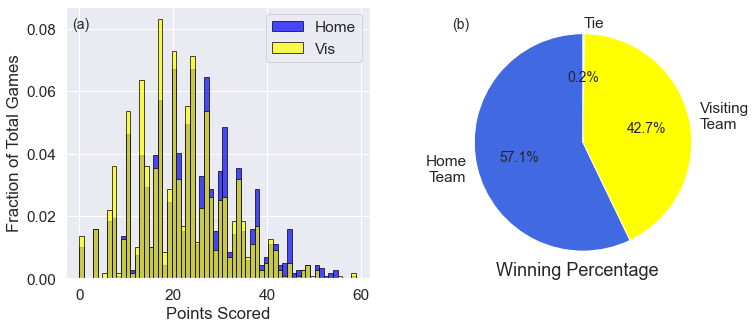

In [150]:
scores = X_show[['H_Game','V_Game']].rename({'H_Game':'Home','V_Game':'Vis'},axis=1)
fig1 = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
_ = plt.xlabel('Points Scored')
_ = plt.ylabel('Fraction of Total Games')
_ = plt.hist(scores['Home'],bins=60,density=True,color='blue',ec='black',alpha=0.7,
         label='Home')
_ = plt.hist(scores['Vis'],bins=60,density=True,color='yellow',ec='black',alpha=0.7,
         label='Vis')
_ = plt.legend(loc='upper right')
ax1.text(0.02,0.92,'(a)',transform=ax1.transAxes)
ax2 = plt.subplot(1,2,2)
win = np.array([(scores['Home'] > scores['Vis']).sum(),(scores['Home'] < scores['Vis']).sum(),
                 (scores['Home'] == scores['Vis']).sum()])
labels = 'Home'+'\n'+'Team', 'Visiting'+'\n'+'Team', 'Tie'
colors = ('royalblue','yellow','black')
_ = plt.pie(win/sum(win),labels=labels,autopct='%1.1f%%',radius=1.0,colors=colors,startangle=90)
_ = plt.text(0.18,0.01,'Winning Percentage',transform=ax2.transAxes,fontsize=18)
ax2.text(0.02,0.92,'(b)',transform=ax2.transAxes)
fig1.show()
fig1.savefig('plots/fig1.png',bbox_inches='tight')

**We can see the range of total score is much larger than that of the Over/Under (3X) with a positive correlation of 0.28.**

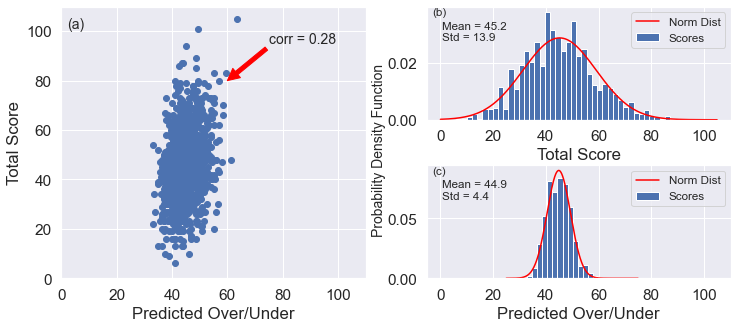

In [152]:
import matplotlib.gridspec as gridspec
from scipy import stats   

fig2 = plt.figure(figsize=(12,5))
outer = gridspec.GridSpec(1, 2, wspace=0.2, hspace=0.2)

inner_l = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[0])
ax = plt.Subplot(fig2, inner_l[0])
#sns.lmplot(x='Over/Under',y='Tot_Pts',data=X_show)
ax.scatter(X_show['Over/Under'],X_show['Tot_Pts'])
ax.set_xlim((0,110))
ax.set_ylim((0,110))
ax.set_xlabel('Predicted Over/Under')
ax.set_ylabel('Total Score')
ax.annotate('corr = 0.28',xy=(60,80),xytext=(75,95),arrowprops={'color':'red'})
ax.text(0.02,0.92,'(a)',transform=ax.transAxes)

fig2.add_subplot(ax)

inner_r = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[1],hspace=0.4)
j=0
mu = np.mean(X_show['Tot_Pts'])
sig = np.std(X_show['Tot_Pts'])
ax0 = plt.Subplot(fig2, inner_r[j])
ax0.set_xlabel('Total Score')
ax0.hist(X_show['Tot_Pts'],bins=50,density=True,label='Scores')
xx = np.linspace(0,105,1000)
yy = stats.norm.pdf(xx,loc=mu,scale=sig)
ax0.plot(xx,yy,color='red',label='Norm Dist')
ax0.legend(loc='upper right',fontsize='small')
ax0.text(0.05,0.7,'Mean = {0:.1f}\nStd = {1:.1f}'.format(mu,sig),transform=ax0.transAxes,fontsize='small')
ax0.text(0.02,0.92,'(b)',transform=ax0.transAxes,fontsize='small')
fig2.add_subplot(ax0)
j=1
mu = np.mean(X_show['Over/Under'])
sig = np.std(X_show['Over/Under'])
ax1 = plt.Subplot(fig2, inner_r[j], sharex=ax0)
ax1.hist(X_show['Over/Under'],bins=16,density=True,label='Scores')
xx = np.linspace(25,75,500)
yy = stats.norm.pdf(xx,loc=np.mean(X_show['Over/Under']),scale=np.std(X_show['Over/Under']))
ax1.plot(xx,yy,color='red',label='Norm Dist')
ax1.legend(loc='upper right',fontsize='small')
ax1.text(0.05,0.7,'Mean = {0:.1f}\nStd = {1:.1f}'.format(mu,sig),transform=ax1.transAxes,fontsize='small')
ax1.text(0.02,0.92,'(c)',transform=ax1.transAxes,fontsize='small')
fig2.add_subplot(ax1)
fig2.text(0.485,0.25,'Probability Density Function',fontsize=14,rotation='vertical')
ax1.set_xlabel('Predicted Over/Under')
fig2.show()
fig2.savefig('plots/fig2.png',bbox_inches='tight')

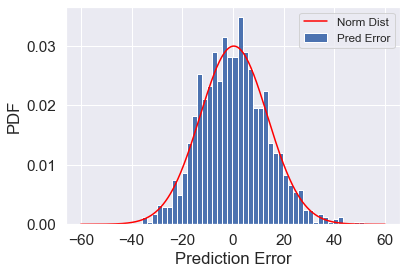

In [153]:
mu = np.mean(error)
sig = np.std(error)
xx = np.linspace(-60,60,500)
yy = stats.norm.pdf(xx,loc=mu,scale=sig)
fig3 = plt.figure()
_ = fig3.add_subplot(1,1,1)
_ = plt.xlabel('Prediction Error')
_ = plt.ylabel('PDF')
_ = plt.hist(error,bins=44,density=True,label='Pred Error')
_ = plt.plot(xx,yy,color='red',label='Norm Dist')
_ = plt.legend(loc='upper right',fontsize='small')
fig3.show()
fig3.savefig('plots/fig3.png',bbox_inches='tight')

**This boxplot shows the symmetry of the error data around 0 and the larger number of positive outliers in the Over/Under prediction error.** 

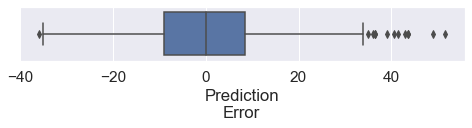

In [162]:
fig4 = plt.figure(figsize=(8,1))
error = pd.Series(error,name='Prediction'+'\n'+'Error')
_ = sns.boxplot(error, orient='h')
fig4.show()
fig4.savefig('plots/fig4.png',bbox_inches='tight')

**There is remarkable symmetry in the Over/Under prediction error, as well as in the Over vs. Under wins. This symmetry is also revealed in the median error, although a greater number of outliers to the upside is reflected in the average error.** 

The median and average errors for the Over are 9.0 and 11.0 points
The median and average errors for the Under are -9.0 and -10.4 points


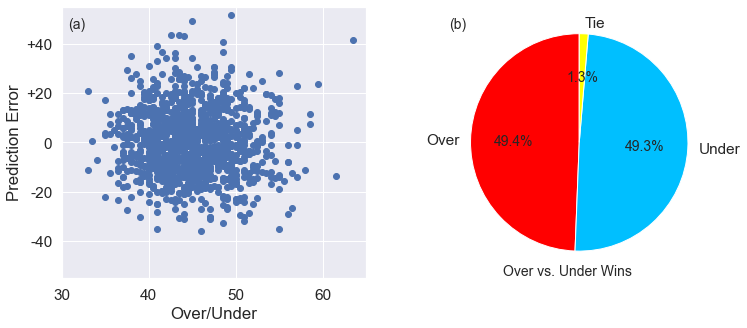

In [163]:
import matplotlib.ticker as tick
fig5, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5)) 
error = X_show['Tot_Pts'] - X_show['Over/Under']
ax1.set_ylim(-55,55)
ax1.set_xlim(30,65)
ax1.set_xlabel('Over/Under')
ax1.set_ylabel('Prediction Error')
ax1.scatter(X_show['Over/Under'],error)
def y_tk_fmt(x,y):
    if x > 0:
        return '{:+d}'.format(int(x))
    else:
        return '{:d}'.format(int(x))
ax1.yaxis.set_major_formatter(tick.FuncFormatter(y_tk_fmt))
ax1.text(0.02,0.92,'(a)',transform=ax1.transAxes,fontsize='medium')
o_u = np.array([(X_show['Tot_Pts'] > X_show['Over/Under']).sum(),
                (X_show['Tot_Pts'] < X_show['Over/Under']).sum(),
                 (X_show['Tot_Pts'] == X_show['Over/Under']).sum()])
labels = 'Over','Under','Tie'
colors = ('red','deepskyblue','yellow')
ax2.pie(o_u/sum(o_u),labels=labels,autopct='%1.1f%%',radius=1.0,colors=colors,
        startangle=90)
ax2.text(0.22,0.01,'Over vs. Under Wins',transform=ax2.transAxes)
ax2.text(0.02,0.92,'(b)',transform=ax2.transAxes,fontsize='medium')
fig5.show()
fig5.savefig('plots/fig5.png',bbox_inches='tight')
import statistics
pos = error[error > 0]
neg = error[error < 0]
print('The median and average errors for the Over are {0:.1f} and {1:.1f} points'
      .format(pos.median(),pos.mean()))
print('The median and average errors for the Under are {0:.1f} and {1:.1f} points'
      .format(neg.median(),neg.mean()))

In [126]:
Q3=error.quantile(0.75)
Q1=error.quantile(0.25)
IQR = Q3-Q1
outliers = X_show.loc[error > 1.5*IQR,:]
outlier_year = pd.Series([int(x[0:4]) for x in outliers.index])
year_counts = outlier_year.value_counts().sort_index()

In [127]:
# Calculate percentage of 'Overs' by year 
year = pd.DataFrame([int(x[0:4]) for x in X_show.index],index=X_show.index)
year['Over'] = X_show['Tot_Pts'] > X_show['Over/Under']
over_count = year['Over'].groupby(year.iloc[:,0]).mean()

**There is no particular pattern with respect to number of outlier games and the year from the bar chart. Furthermore, the Over winning percentage is not constant by year, as shown in the line plot. However, there does seem to be some correlation between the Over winning percentage and the number of outlier games.** 

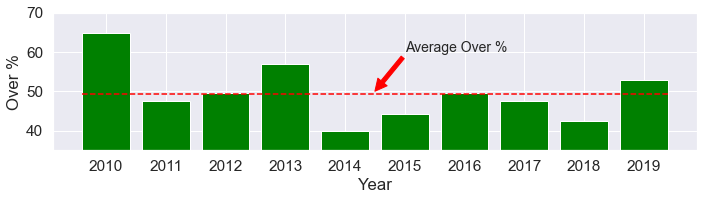

In [164]:
fig6 = plt.figure(figsize=(10,3))
_ = fig6.add_subplot(1,1,1)
_ = plt.xlabel('Year')
_ = plt.ylabel('Over %')
_ = plt.bar(year_counts.index,over_count.values*100,color='green',
       tick_label=[str(i) for i in range(2010,2020)])
_ = plt.ylim(35,70)
_ = plt.hlines(49.4,2009.6,2019.4,linestyle='dashed',colors='red')
_ = plt.annotate('Average Over %',xy=(2014.5,50),xytext=(2015,60),arrowprops={'color':'red'})
#ax2 = ax.twinx()
#ax2.set_ylabel('Number of Outlier Games')
#ax2.plot(over_count.index,over_count.values*100,linewidth=1, color='blue')
fig6.tight_layout()  
fig6.show()
fig6.savefig('plots/fig6.png')

In [177]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

**Examining the upside outlier games further, these games seem to be populated by certain scenarios. Here is a bar plot demonstrating the difference between the mean outlier value and the general mean value as a fraction of the general standard deviation for the categories in our dataset. Games that are poorly predicted to the upside seem to have some of the following characteristics in our dataset:**
 * Home teams having strong pass offenses, particularly those combined with weak visiting pass defenses, as reflected in "H_Pass_Metric" 
 * Home teams with a strong tendency to obtain turnovers
 * Home teams with high red zone percentages against teams with low red zone percentages
 * Visiting teams with penchant for incurring penalties

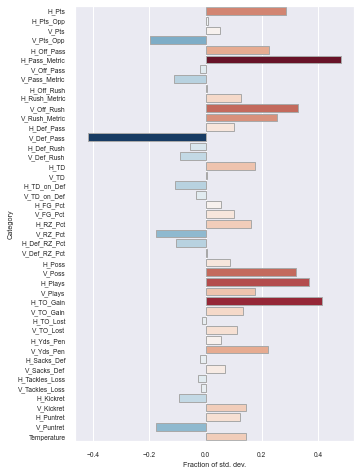

In [199]:
out_desc=outliers.describe()
desc = X_show.describe()
fig7 = plt.figure(figsize=(5,8))
_ = fig7.add_subplot(1,1,1)
_ = plt.xlabel('Fraction of std. dev.')
_ = plt.ylabel('Category')
category = list(X_show.columns[6:51])
dev = ((out_desc.loc['mean',category]-desc.loc['mean',category])/
       desc.loc['std',category])
sns.set(font_scale=0.65)
sns.barplot(x=dev,y=category,edgecolor='darkgray',palette=colors_from_values(dev,'RdBu_r'))
fig7.show()
fig7.savefig('plots/fig7.png')

**The following correlation matrix reveals that there seems to be a much greater correlation between the scoring history of the teams and the predicted over/under (0.45,0.46) than between the scoring history and the actual total score of the predicted game (0.14,0.13). In addition, there is little to no correlation between the opposing teams' scores of the last five games and the total score of the game in question (0.00,0.05). Also revealed is that there is significant correlation between red zone percentage and scoring history, as expected, but little correlation with scoring history and field goal percentage. The importance of red zone percentage is reflected in the over/under prediction, but less so in the actual total score.**

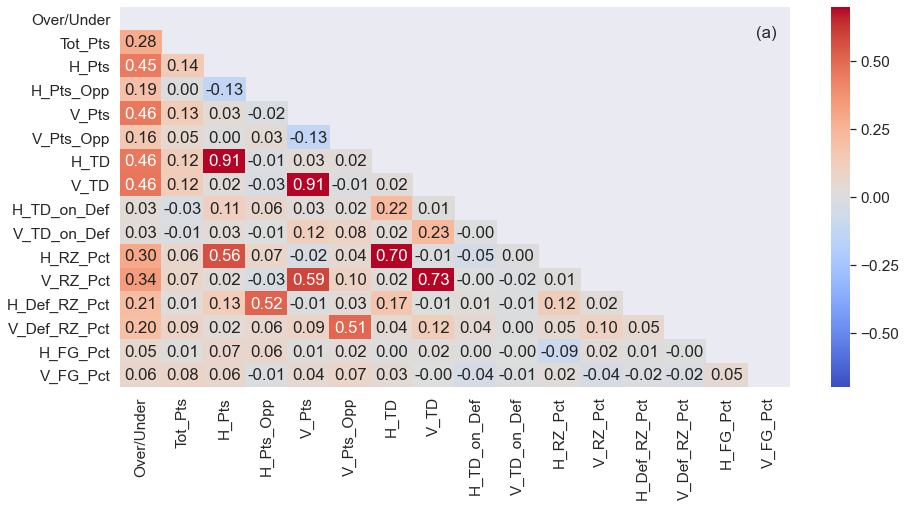

In [205]:
fig8a = plt.figure(figsize=(15,7))
ax = fig8a.add_subplot(1,1,1)
Points=X_show[['Over/Under','Tot_Pts','H_Pts','H_Pts_Opp','V_Pts','V_Pts_Opp','H_TD',
               'V_TD','H_TD_on_Def','V_TD_on_Def','H_RZ_Pct','V_RZ_Pct',
               'H_Def_RZ_Pct','V_Def_RZ_Pct','H_FG_Pct','V_FG_Pct']]
mask = np.triu(Points.corr())
sns.set(font_scale=1.4)
sns.heatmap(Points.corr(),vmin=-0.7,center=0,vmax=0.7,mask=mask,
            annot=True,cmap='coolwarm',fmt='.2f')
_ = plt.text(0.95,0.92,'(a)',transform=ax.transAxes,fontsize='medium')
fig8a.show()
fig8a.savefig('plots/fig8a.png')

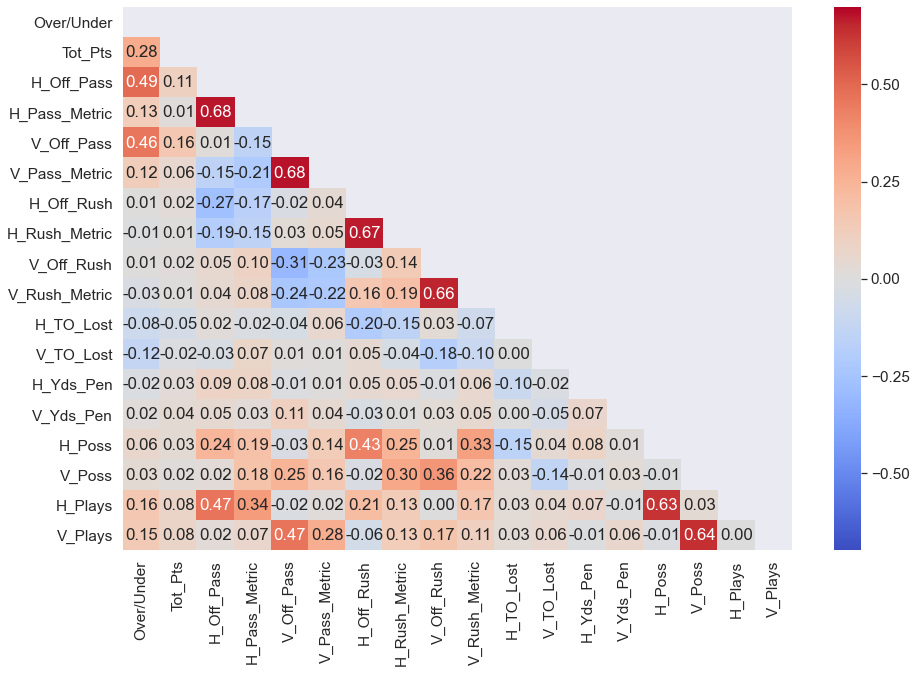

In [21]:
fig8b = plt.figure(figsize=(15,10))
ax = fig8b.add_subplot(1,1,1)
Ostats=X_show[['Over/Under','Tot_Pts','H_Off_Pass','H_Pass_Metric','V_Off_Pass',
              'V_Pass_Metric','H_Off_Rush','H_Rush_Metric','V_Off_Rush',
              'V_Rush_Metric','H_TO_Lost','V_TO_Lost','H_Yds_Pen','V_Yds_Pen',
              'H_Poss','V_Poss','H_Plays','V_Plays']]
mask = np.triu(Ostats.corr())
sns.set(font_scale=1.4)
sns.heatmap(Ostats.corr(),vmin=-0.7,center=0,vmax=0.7,mask=mask,
            annot=True,cmap='coolwarm',fmt='.2f')
fig8b.show()

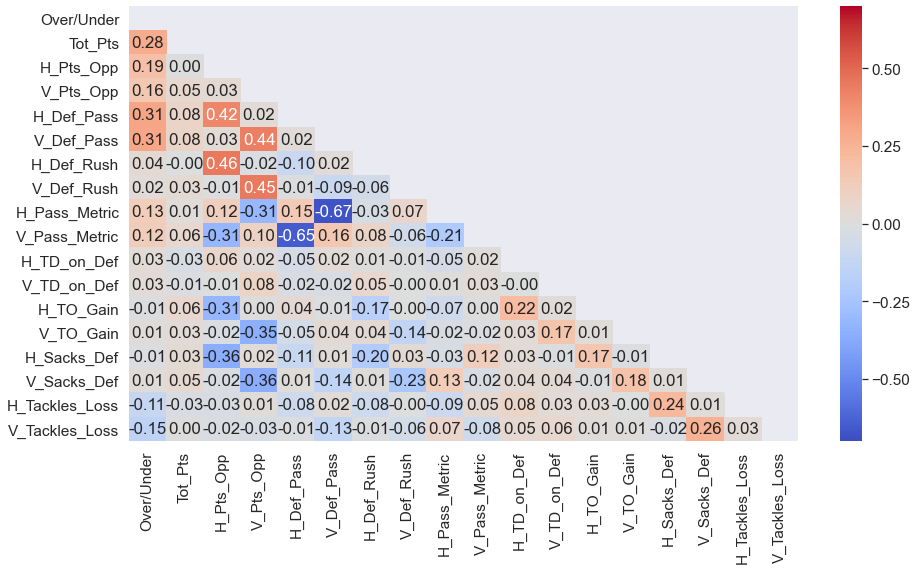

In [175]:
fig8c = plt.figure(figsize=(15,8))
ax = fig8c.add_subplot(1,1,1)
Dstats=X_show[['Over/Under','Tot_Pts','H_Pts_Opp','V_Pts_Opp','H_Def_Pass','V_Def_Pass',
               'H_Def_Rush','V_Def_Rush','H_Pass_Metric','V_Pass_Metric','H_TD_on_Def','V_TD_on_Def',
               'H_TO_Gain','V_TO_Gain','H_Sacks_Def','V_Sacks_Def','H_Tackles_Loss','V_Tackles_Loss']]
mask = np.triu(Dstats.corr())
sns.set(font_scale=1.4)
sns.heatmap(Dstats.corr(),vmin=-0.7,center=0,vmax=0.7,mask=mask,
            annot=True,cmap='coolwarm',fmt='.2f')
fig8c.show()

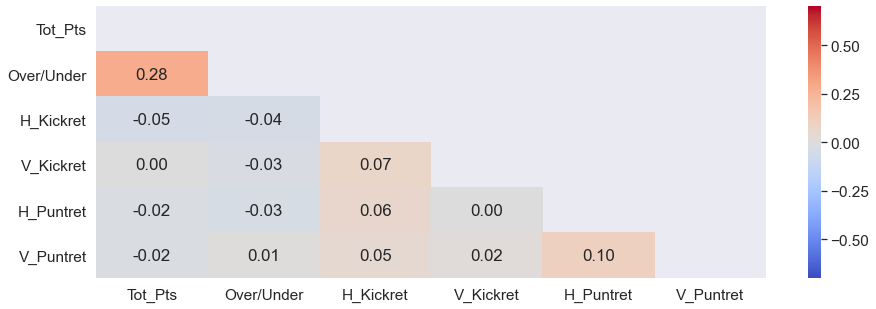

In [23]:
fig8d = plt.figure(figsize=(15,5))
Sstats=X_show[['Tot_Pts','Over/Under','H_Kickret','V_Kickret',
              'H_Puntret','V_Puntret']]
mask = np.triu(Sstats.corr())
sns.heatmap(Sstats.corr(),vmin=-0.7,center=0,vmax=0.7,mask=mask,
            annot=True,cmap='coolwarm',fmt='.2f')
fig8d.show()

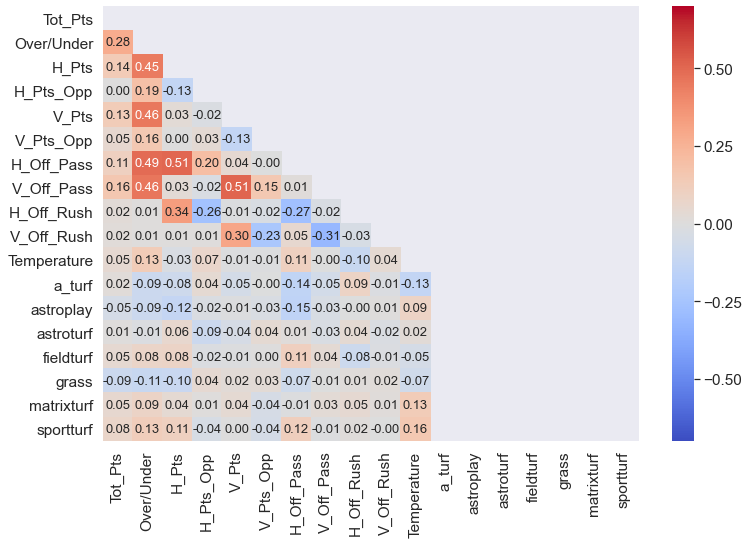

In [24]:
fig8e = plt.figure(figsize=(12,8))
Gstats=X_show[['Tot_Pts','Over/Under','H_Pts','H_Pts_Opp','V_Pts','V_Pts_Opp',
             'H_Off_Pass','V_Off_Pass','H_Off_Rush','V_Off_Rush','Temperature',
             'a_turf','astroplay','astroturf','fieldturf','grass','matrixturf','sportturf']]
mask = np.triu(Gstats.corr())

# masks correlations of surface categories with each other
surfcol=['a_turf','astroplay','astroturf','fieldturf','grass','matrixturf','sportturf']
for col in surfcol:
    ind = Gstats.columns.get_loc(col)
    for i in range(ind+1,len(mask)):
        mask[i,ind] = mask[ind,i]

sns.set(font_scale=1.4)
sns.heatmap(Gstats.corr(),vmin=-0.7,center=0,vmax=0.7,mask=mask,
            annot=True,cmap='coolwarm',fmt='.2f',annot_kws={"size":13})
fig8e.show()

In [25]:
def weekofgame(game):
    from datetime import timedelta, datetime as dt
    day_of_week={2:0,3:1,4:2,5:3,6:4,0:5,1:6} #day of week starts on Wednesday
    date = dt.strptime(game[0:8],'%Y%m%d')
# .weekday() returns the day of the week for datetime.datetime   
    beg_week = date - timedelta(days=day_of_week[date.weekday()])
    fmt = lambda x: str(x) if x >= 10 else '0'+str(x)
    return(fmt(beg_week.month)+fmt(beg_week.day))

def get_mapping(group):
    d={}
    keys = sorted(group['Week_Beg'].unique())
    values = [i for i in range(6,6+len(keys))]
    for key,value in zip(keys,values):
        d[key] = value
    return d

def get_year(code):
    if (code[4:6] == '01'):
        year = str(int(code[0:4])-1)
    else:
        year = str(int(code[0:4]))
    return year

def combine_dummies(df, name, combine_cols):
    for col in combine_cols:
        ind=df[df[col]==1].index
        df.loc[ind,name] = col
        df.drop(col,axis=1,inplace=True)
    return df

In [26]:
by_week = X_show[['Tot_Pts','Temperature']]
for ind in by_week.index: 
    by_week.loc[ind,'Week_Beg'] = weekofgame(ind)
    by_week.loc[ind,'Year'] = get_year(ind)
grouped_by_year = by_week.groupby(by_week['Year'])
for key, item in grouped_by_year:
    mapping = get_mapping(item)
    for code in item.index:
        by_week.loc[code,'Week'] = int(mapping[by_week.loc[code,'Week_Beg']])
by_week['Week'] = by_week['Week'].astype('int')

In [27]:
avg_pts_week = by_week['Tot_Pts'].groupby(by_week['Week']).mean()
avg_temp_week = by_week['Temperature'].groupby(by_week['Week']).mean()

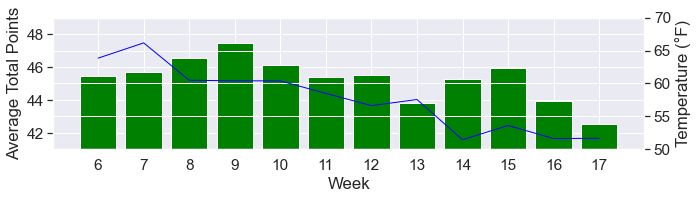

In [28]:
fig9 = plt.figure(figsize=(10,3))
_ = fig9.add_subplot(2,1,1)
_ = plt.xlabel('Week')
_ = plt.ylabel('Average Total Points')
_ = plt.ylim(41,49)
_ = plt.bar(avg_pts_week.index,avg_pts_week.values,color='green',
       tick_label=[str(i) for i in range(6,18)])
#ax2 = ax.twinx()
#ax2.set_ylabel('Temperature (°F)')
#ax2.set_ylim(50,70)
#ax2.plot(avg_temp_week.index,avg_temp_week.values,linewidth=1, color='blue')
_ = fig9.add_subplot(2,1,1)
_ = plt.bar()
fig9.tight_layout()  
fig9.show()

In [172]:
bins.remove(20)

In [173]:
temp = X_show[['Tot_Pts','Temperature']]
bins = [i for i in range(0,91,10)]
bins.remove(10)
grouped = temp.groupby(pd.cut(temp.Temperature,bins))
print(grouped['Tot_Pts'].mean(),grouped['Tot_Pts'].count())

Temperature
(0, 20]     40.312500
(20, 30]    45.000000
(30, 40]    43.577778
(40, 50]    44.477157
(50, 60]    45.345972
(60, 70]    46.566316
(70, 80]    44.117647
(80, 90]    42.115385
Name: Tot_Pts, dtype: float64 Temperature
(0, 20]      16
(20, 30]     51
(30, 40]    135
(40, 50]    197
(50, 60]    211
(60, 70]    475
(70, 80]    102
(80, 90]     26
Name: Tot_Pts, dtype: int64


In [171]:
X_show['Temperature'].describe()

count    1213.000000
mean       57.248969
std        15.427966
min         1.000000
25%        46.000000
50%        60.000000
75%        70.000000
max        90.000000
Name: Temperature, dtype: float64

In [29]:
surf_cols=['a_turf','astroplay','astroturf','fieldturf','grass','matrixturf','sportturf']
surface = pd.concat([X_show[['Tot_Pts']],X_show[surf_cols]],axis=1)
by_surface = combine_dummies(surface,'surface',surf_cols)
avg_pts_surf=by_surface['Tot_Pts'].groupby(by_surface['surface']).mean()

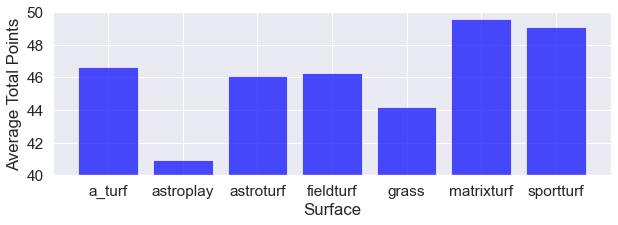

In [30]:
fig10 = plt.figure(figsize=(10,3))
ax = fig10.add_subplot(1,1,1)
ax.set_xlabel('Surface')
ax.set_ylabel('Average Total Points')
ax.set_ylim(40,50)
ax.bar(avg_pts_surf.index,avg_pts_surf.values,color='blue',alpha=0.7)
fig10.show()

In [31]:
from scipy.stats import pearsonr

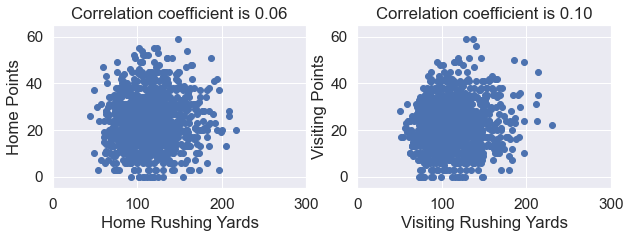

In [32]:
fig11, (ax1,ax2) = plt.subplots(1,2,figsize=(10,3)) 
ax1.set_xlabel('Home Rushing Yards')
ax1.set_ylabel('Home Points')
ax1.set_xlim(0,300)
ax1.set_ylim(-5,65)
corr, _=pearsonr(X_show['H_Off_Rush'], X_show['H_Game'])
ax1.set_title('Correlation coefficient is {0:.2f}'.format(corr))
ax1.scatter(X_show['H_Off_Rush'],X_show['H_Game'])
ax2.set_xlabel('Visiting Rushing Yards')
ax2.set_ylabel('Visiting Points')
ax2.set_xlim(0,300)
ax2.set_ylim(-5,65)
corr, _=pearsonr(X_show['V_Off_Rush'], X_show['V_Game'])
ax2.set_title('Correlation coefficient is {0:.2f}'.format(corr))
ax2.scatter(X_show['V_Off_Rush'],X_show['V_Game'])
fig11.show()

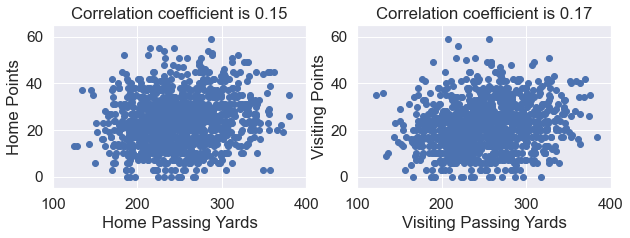

In [33]:
fig12, (ax1,ax2) = plt.subplots(1,2,figsize=(10,3)) 
ax1.set_xlabel('Home Passing Yards')
ax1.set_ylabel('Home Points')
ax1.set_xlim(100,400)
ax1.set_ylim(-5,65)
corr, _=pearsonr(X_show['H_Off_Pass'], X_show['H_Game'])
ax1.set_title('Correlation coefficient is {0:.2f}'.format(corr))
ax1.scatter(X_show['H_Off_Pass'],X_show['H_Game'])
ax2.set_xlabel('Visiting Passing Yards')
ax2.set_ylabel('Visiting Points')
ax2.set_xlim(100,400)
ax2.set_ylim(-5,65)
corr, _=pearsonr(X_show['V_Off_Pass'], X_show['V_Game'])
ax2.set_title('Correlation coefficient is {0:.2f}'.format(corr))
ax2.scatter(X_show['V_Off_Pass'],X_show['V_Game'])
fig12.show()

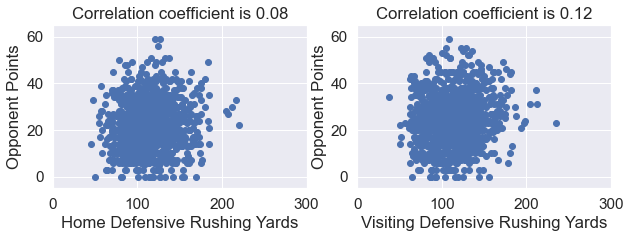

In [34]:
fig13, (ax1,ax2) = plt.subplots(1,2,figsize=(10,3)) 
ax1.set_xlabel('Home Defensive Rushing Yards')
ax1.set_ylabel('Opponent Points')
ax1.set_xlim(0,300)
ax1.set_ylim(-5,65)
corr, _=pearsonr(X_show['H_Def_Rush'], X_show['V_Game'])
ax1.set_title('Correlation coefficient is {0:.2f}'.format(corr))
ax1.scatter(X_show['H_Def_Rush'],X_show['V_Game'])
ax2.set_xlabel('Visiting Defensive Rushing Yards')
ax2.set_ylabel('Opponent Points')
ax2.set_xlim(0,300)
ax2.set_ylim(-5,65)
corr, _=pearsonr(X_show['V_Def_Rush'], X_show['H_Game'])
ax2.set_title('Correlation coefficient is {0:.2f}'.format(corr))
ax2.scatter(X_show['V_Def_Rush'],X_show['H_Game'])
fig13.show()

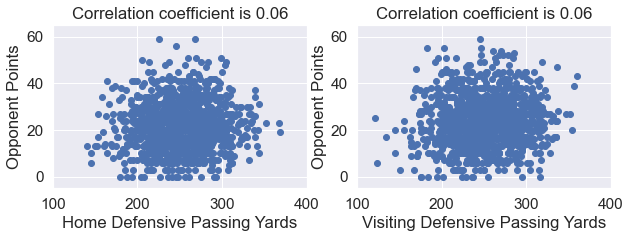

In [35]:
fig14, (ax1,ax2) = plt.subplots(1,2,figsize=(10,3)) 
ax1.set_xlabel('Home Defensive Passing Yards')
ax1.set_ylabel('Opponent Points')
ax1.set_xlim(100,400)
ax1.set_ylim(-5,65)
corr, _=pearsonr(X_show['H_Def_Pass'], X_show['V_Game'])
ax1.set_title('Correlation coefficient is {0:.2f}'.format(corr))
ax1.scatter(X_show['H_Def_Pass'],X_show['V_Game'])
ax2.set_xlabel('Visiting Defensive Passing Yards')
ax2.set_ylabel('Opponent Points')
ax2.set_xlim(100,400)
ax2.set_ylim(-5,65)
corr, _=pearsonr(X_show['V_Def_Pass'], X_show['H_Game'])
ax2.set_title('Correlation coefficient is {0:.2f}'.format(corr))
ax2.scatter(X_show['V_Def_Pass'],X_show['H_Game'])
fig14.show()